In [4]:
 #### ML Life Cycle
## Problem Defination
# Data Collection
# Data Cleaning & Pre-Processing
# EDA
# Feature Engineering & Selection
# Model Selection
# Model Training
# Model Evaluation and Tuning
# Model Deployment
# Model Monitoring & Maintenance
##

In [5]:
import numpy as np
import pandas as pd

In [6]:
titanic = pd.read_csv(r"C:\Users\PAUL\Desktop\dataset\Titanicdata.csv")

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
titanic.duplicated().sum()

np.int64(0)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
## List out columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
## To group into numerical & Categorical

cat_col = [col for col in titanic.columns if titanic[col].dtype == "object"]
num_col = [col for col in titanic.columns if titanic[col].dtype != "object"]

print("Categorial Columns", cat_col)
print("Numerical Columns", num_col)

Categorial Columns ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
# # For categorical duplictated Value
titanic[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [15]:
# For numerical duplictated Value
titanic[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [16]:
# For missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
## To find the % missing values
round((titanic.isnull().sum()/titanic.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [18]:
## To drop some colums tempoarily
Titanic1 = titanic.drop(columns= ["Name", "Ticket", "Cabin"])

In [19]:
pd.__version__

'2.2.3'

In [20]:
Titanic1.fillna({"Age": Titanic1["Age"].mean()}, inplace=True)

In [21]:
Titanic1["Age"].isnull().sum()## To check if there is still any missing column for age

np.int64(0)

In [22]:
Titanic1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

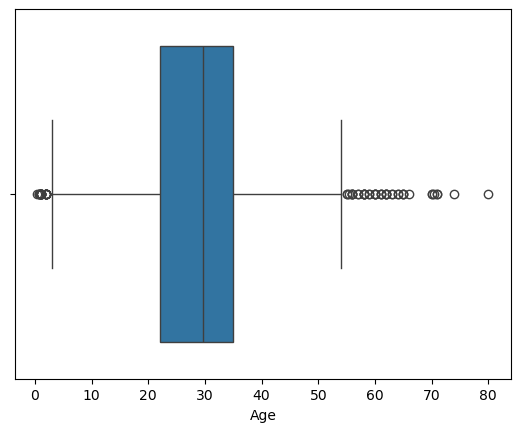

In [24]:
sns.boxplot(x="Age", data = Titanic1);

In [25]:
## Data Validation & Verification

In [26]:
x = Titanic1[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = Titanic1["Survived"]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# Identify numeric columns safely
num_col = x.select_dtypes(include='number').columns

# Make a TRUE copy of the dataframe
x1 = x.copy()

# Scale only numeric columns
x1[num_col] = scaler.fit_transform(x1[num_col])

x1.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [28]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1)) 

num_col = [col for col in x.columns if x[col].dtype !="object"] 
x1 = x 
x1[num_col] = scaler.fit_transform (x1[num_col]) 

x1.head()

C:\Users\PAUL\AppData\Local\Temp\ipykernel_14520\2814721081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col] = scaler.fit_transform (x1[num_col])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [29]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
